In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch, random
import torchvision.models as models
import torch.nn as nn


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


SEED = 111
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

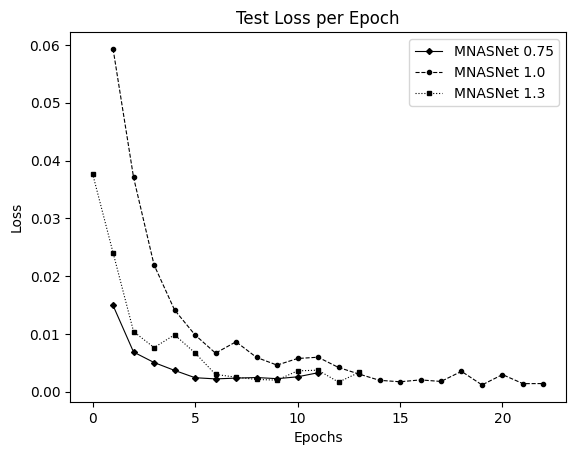

In [70]:
mnas0_75_loss = pd.read_csv("losses_list_MNASNet_0-75.csv")
mnas1_0_loss = pd.read_csv("losses_list_MNASNet_1-0.csv")
mnas1_3_loss = pd.read_csv("losses_list_MNASNet_1-3.csv")

max_epochs = max(len(mnas0_75_loss), len(mnas1_0_loss), len(mnas1_3_loss))

fig = plt.figure()
plt.plot(mnas0_75_loss.index + 1, mnas0_75_loss['test_losses'], 'k-', label = 'MNASNet 0.75', marker='D', markersize=3, linewidth=0.8)
plt.plot(mnas1_0_loss.index + 1, mnas1_0_loss['test_losses'], 'k--', label = 'MNASNet 1.0', marker='o', markersize=3, linewidth=0.8)
plt.plot(mnas1_3_loss.index, mnas1_3_loss['test_losses'], 'k:', label = 'MNASNet 1.3', marker='s', markersize=3, linewidth=0.8)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss per Epoch')
plt.legend()
plt.savefig('test_loss_comparison.png')
plt.show()


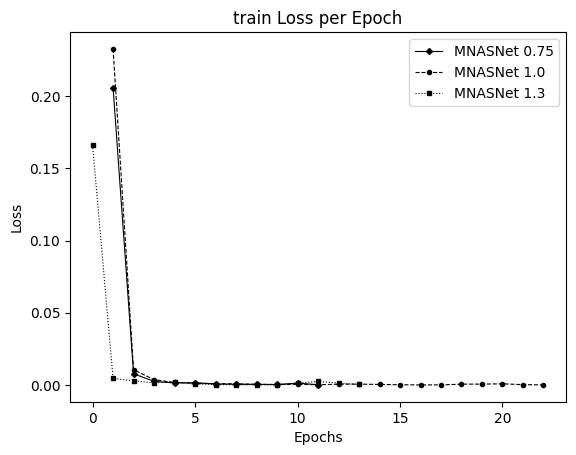

In [71]:
fig = plt.figure()
plt.plot(mnas0_75_loss.index + 1, mnas0_75_loss['train_losses'], 'k-', label = 'MNASNet 0.75', marker='D', markersize=3, linewidth=0.8)
plt.plot(mnas1_0_loss.index + 1, mnas1_0_loss['train_losses'], 'k--', label = 'MNASNet 1.0', marker='o', markersize=3, linewidth=0.8)
plt.plot(mnas1_3_loss.index, mnas1_3_loss['train_losses'], 'k:', label = 'MNASNet 1.3', marker='s', markersize=3, linewidth=0.8)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('train Loss per Epoch')
plt.legend()
plt.savefig('train_loss_comparison.png')
plt.show()

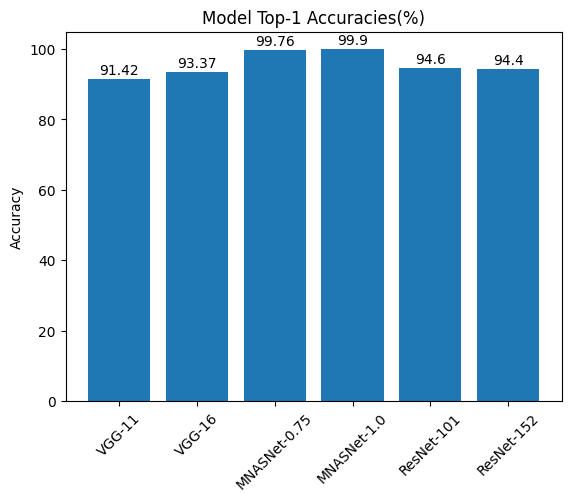

In [74]:

models_list = ['VGG-11', 'VGG-16', 'MNASNet-0.75', 'MNASNet-1.0', 'ResNet-101', 'ResNet-152']
accuracies = [91.42, 93.37, 99.76, 99.9, 94.6, 94.4]

fig = plt.figure()
plt.bar(models_list, accuracies)
for i, value in enumerate(accuracies):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Model Top-1 Accuracies(%)')
plt.savefig('top-accuracies.png')
plt.show()